# Landuse and Socio Economic Survey

University of Dhaka took to Gouripur urban area and Krisnaprasadpur Mouza to observe and evaluate the basic land use pattern of that area. The inhabitants of the area were being surveyed. The study is conducted with a view of expand by knowledge about the land use pattern and socio-economic condition.

<img src="study.png" title="title" width="500" height="100">

The first task was identifying the location of grid using grand master map and group master map. After identifying the location of grid, we determined the grid plots in the field. Identifying plots was one of the major challenges in this survey. Major land-use portion was considered for each plot of the study area. After selecting some household under the grid area ask question to the respondents. During the survey we collected information about the gender, famil type, income over lastr 10 years, living satisfaction, occupation, marital status etc. These informations are valuable to analyze the socio economic condition of these area.

<img src="tania_survey.jpg" width="400" height="100">


The summary fo our findings:
1. In rural are people with less income have high living satisfaction
2. In urban are due to high cost poor people are not that happy with their life. Some extra rich people are having high living statisfaction.

You can see the detailed reulsts below.

In [1]:
import pandas as pd
import numpy as np

from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

In [2]:
rural_df_all=pd.read_excel("rural.xlsx",header=None)
urban_df_all=pd.read_excel("urban.xlsx",header=None)
column_names=['gender','family_type','religion','age_range','education','marital_status','occupation','income','income_5','income_10','expenditure','expenditure_5','expenditure_10','savings','loan','savings_medium','isStaisfied']
column_index=[2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,59]
rural_df=rural_df_all.loc[:,column_index]
urban_df=urban_df_all.loc[:,column_index]
rural_df.columns=column_names
urban_df.columns=column_names
print("Number of participants in rural area: ",len(rural_df))
print("Number of participants in urban area: ",len(urban_df))

Number of participants in rural area:  92
Number of participants in urban area:  219


In [3]:
urban_df

,gender,family_type,religion,age_range,education,marital_status,occupation,income,income_5,income_10,expenditure,expenditure_5,expenditure_10,savings,loan,savings_medium,isStaisfied
0,Male,Nuclear family,Hindu,26 to 30 years,Graduate,Married,Service-holder,20001 to 30000,200001 to 500000,100001 to 200000,Less than 10000,200001 to 500000,200001 to 500000,200001 to 500000,50001 to 100000,Community institute,Very satisfied
1,Male,Nuclear family,Muslim,16 to 20 years,Graduate,Married,Businessman,10001 to 20000,100001 to 200000,100001 to 200000,100001 to 200000,200001 to 500000,100001 to 200000,50001 to 100000,More than 100000,Bank,Satisfied
2,Male,Joint family,Muslim,More than 50 years,Graduate,Married,Businessman,20001 to 30000,More than 1000000,More than 1000000,500001 to 1000000,More than 1000000,500001 to 1000000,200001 to 500000,More than 100000,Bank,Moderately satisfied
3,Male,Joint family,Muslim,46 to 50 years,Secondary,Married,Businessman,5001 to 10000,200001 to 500000,100001 to 200000,50001 to 100000,50001 to 100000,200001 to 500000,200001 to 500000,Not applicable,Not applicable,Dissatisfied
4,Male,Nuclear family,Muslim,31 to 35 years,Primary,Married,Farmer,10001 to 20000,100001 to 200000,50001 to 100000,50001 to 100000,100001 to 200000,50001 to 100000,20001 to 50000,10001 to 20000,Community institute,Moderately satisfied
5,Male,Joint family,Hindu,26 to 30 years,Secondary,Married,Others,20001 to 30000,200001 to 500000,100001 to 200000,50001 to 100000,100001 to 200000,50001 to 100000,50001 to 100000,50001 to 100000,Bank,Moderately satisfied
6,Male,Nuclear family,Muslim,41 to 45 years,Graduate,Married,Businessman,10001 to 20000,100001 to 200000,50001 to 100000,20001 to 50000,100001 to 200000,50001 to 100000,20001 to 50000,10001 to 20000,Bank,Satisfied
7,Male,Nuclear family,Muslim,16 to 20 years,Graduate,Married,Businessman,10001 to 20000,100001 to 200000,50001 to 100000,50001 to 100000,100001 to 200000,100001 to 200000,100001 to 200000,Not applicable,Not applicable,Satisfied
8,Female,Nuclear family,Hindu,26 to 30 years,Primary,Married,Day labour,5001 to 10000,10001 to 20000,10001 to 20000,Less than 10000,50001 to 100000,50001 to 100000,Less than 10000,Not available,Not available,Satisfied
9,Male,Nuclear family,Hindu,More than 50 years,Illiterate,Married,Day labour,5001 to 10000,100001 to 200000,50001 to 100000,20001 to 50000,50001 to 100000,20001 to 50000,20001 to 50000,Not available,Not applicable,Moderately satisfied


In [4]:
print("Education Type:")
set(rural_df['education'].tolist())

Education Type:


{'Graduate',
 'Higher secondary',
 'Illiterate',
 'Lower secondary (class 8)',
 'Primary',
 'Secondary'}

In [5]:
statisfaction_vs_education=rural_df.groupby('isStaisfied')['education'].apply(list).reset_index(name='new')

In [6]:
statisfaction_vs_education

,isStaisfied,new
0,Highly dissatisfied,[Illiterate]
1,Moderately satisfied,"[Graduate, Primary, Secondary, Illiterate, Pri..."
2,Not applicable,"[Primary, Higher secondary, Primary, Higher se..."
3,Not available,[Higher secondary]
4,Satisfied,"[Primary, Primary, Primary, Illiterate, Illite..."
5,Very satisfied,"[Illiterate, Illiterate, Illiterate, Primary, ..."


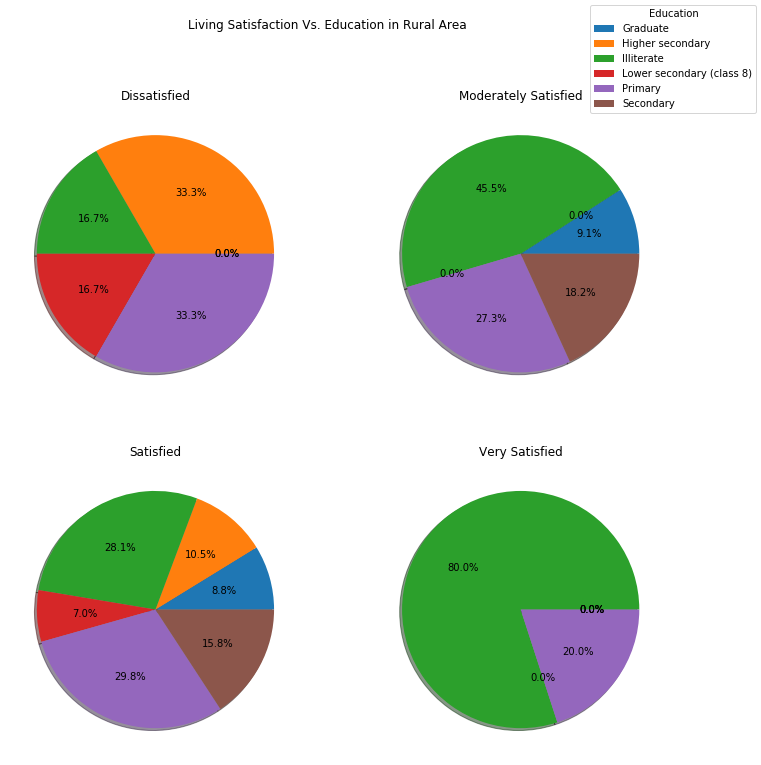

In [7]:
labels=['Graduate',
 'Higher secondary',
 'Illiterate',
 'Lower secondary (class 8)',
 'Primary',
 'Secondary']

dissatisfied,moderately_satisfied,satisfied,very_satisfied=[0.]*len(labels),[0.]*len(labels),[0.]*len(labels),[0.]*len(labels)


for index, row in statisfaction_vs_education.iterrows():
    education=row['new']

    for e in education:
        if row['isStaisfied']=="Not applicable":
            dissatisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Moderately satisfied":
            moderately_satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Satisfied":
            satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Very satisfied":
            very_satisfied[labels.index(e)]+=1
            
            
fig, axs = plt.subplots(2, 2,figsize=(12, 12))
axs[0, 0].pie(dissatisfied/np.sum(dissatisfied), autopct='%1.1f%%', shadow=True)
axs[0, 0].title.set_text('Dissatisfied')
axs[0, 1].pie(moderately_satisfied/np.sum(moderately_satisfied), autopct='%1.1f%%', shadow=True)
axs[0, 1].title.set_text('Moderately Satisfied')
axs[1, 0].pie(satisfied/np.sum(satisfied), autopct='%1.1f%%', shadow=True)
axs[1, 0].title.set_text('Satisfied')
axs[1, 1].pie(very_satisfied/np.sum(very_satisfied), autopct='%1.1f%%', shadow=True)
axs[1,1].title.set_text('Very Satisfied')

fig.legend( labels,title="Education")
fig.suptitle("Living Satisfaction Vs. Education in Rural Area")

plt.show()

## Living Satisfaction Vs. Education in Rural Area
From the result above we can that how living satisfaction varies with the education status im rural are. It is very clear from the result that illetrate or less educated exoressed that they are happy with their living condition compare to the educated people. These results are very interesting. Simple life can makeyou happy.  

In [8]:
statisfaction_vs_education=urban_df.groupby('isStaisfied')['education'].apply(list).reset_index(name='new')

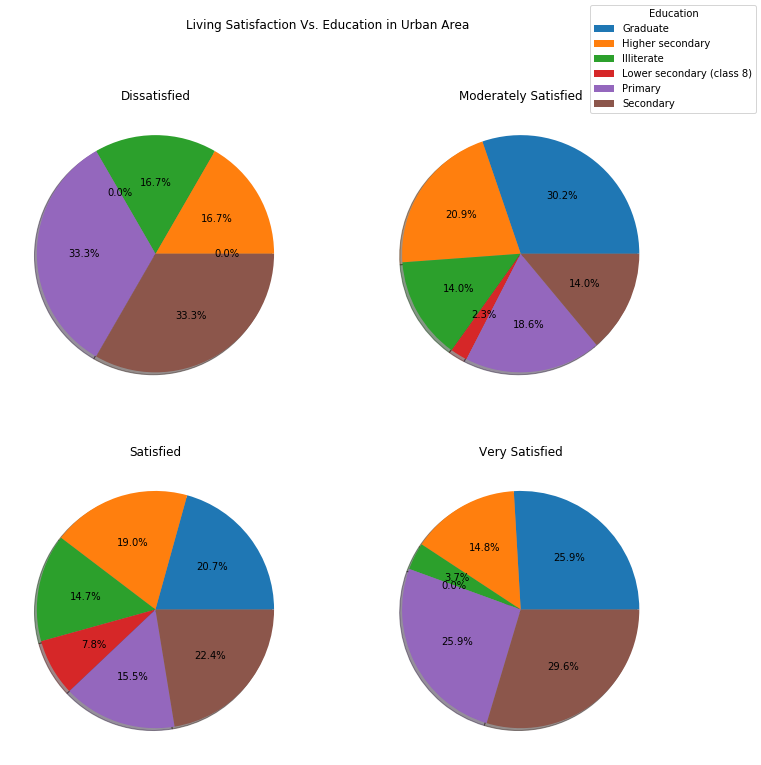

In [9]:
labels=['Graduate',
 'Higher secondary',
 'Illiterate',
 'Lower secondary (class 8)',
 'Primary',
 'Secondary']

dissatisfied,moderately_satisfied,satisfied,very_satisfied=[0.]*len(labels),[0.]*len(labels),[0.]*len(labels),[0.]*len(labels)


for index, row in statisfaction_vs_education.iterrows():
    education=row['new']

    for e in education:
        if e=='Post-graduate' or e=="Others":
            continue
            
        if row['isStaisfied']=="Not applicable":
            dissatisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Moderately satisfied":
            moderately_satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Satisfied":
            satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Very satisfied":
            very_satisfied[labels.index(e)]+=1
            
            
fig, axs = plt.subplots(2, 2,figsize=(12, 12))
axs[0, 0].pie(dissatisfied/np.sum(dissatisfied), autopct='%1.1f%%', shadow=True)
axs[0, 0].title.set_text('Dissatisfied')
axs[0, 1].pie(moderately_satisfied/np.sum(moderately_satisfied), autopct='%1.1f%%', shadow=True)
axs[0, 1].title.set_text('Moderately Satisfied')
axs[1, 0].pie(satisfied/np.sum(satisfied), autopct='%1.1f%%', shadow=True)
axs[1, 0].title.set_text('Satisfied')
axs[1, 1].pie(very_satisfied/np.sum(very_satisfied), autopct='%1.1f%%', shadow=True)
axs[1,1].title.set_text('Very Satisfied')

fig.legend( labels,title="Education")

fig.suptitle("Living Satisfaction Vs. Education in Urban Area")
plt.show()

## Living Satisfaction Vs. Education in Urban Area
But in urban are the condition is different than the rural area. Educated people are also showing satisfaction. May be in urban are illeterate people does not make that much money which makes their life difficult there

In [10]:
rural_occupations=list(set(rural_df['occupation'].tolist()))
urban_occupations=list(set(urban_df['occupation'].tolist()))

In [11]:
rural_occupations

['Day labour',
 'Farmer',
 'Service-holder',
 'Driver',
 'Others',
 'Rickshawpuller/Vanpuller',
 'Businessman']

In [12]:
urban_occupations

['Day labour',
 'Farmer',
 'Tailor',
 'Service-holder',
 'Driver',
 'Teacher',
 'Others',
 'Rickshawpuller/Vanpuller',
 'Doctor',
 'Businessman']

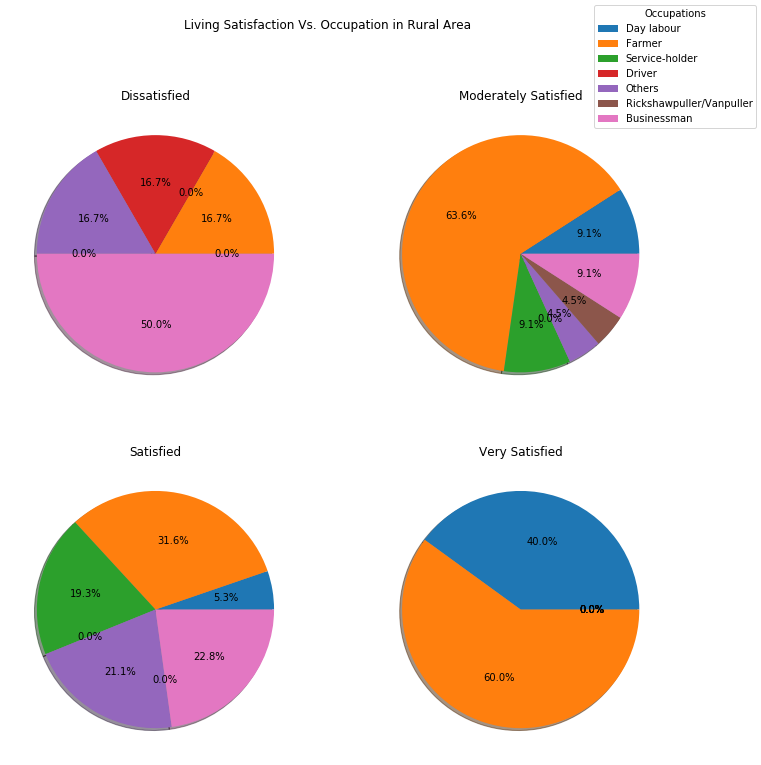

In [13]:
statisfaction_vs_occupation=rural_df.groupby('isStaisfied')['occupation'].apply(list).reset_index(name='new')
labels=rural_occupations

dissatisfied,moderately_satisfied,satisfied,very_satisfied=[0.]*len(labels),[0.]*len(labels),[0.]*len(labels),[0.]*len(labels)


for index, row in statisfaction_vs_occupation.iterrows():
    occupation=row['new']

    for e in occupation:
#         if e=='Post-graduate' or e=="Others":
#             continue 
        if row['isStaisfied']=="Not applicable":
            dissatisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Moderately satisfied":
            moderately_satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Satisfied":
            satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Very satisfied":
            very_satisfied[labels.index(e)]+=1
            
            
fig, axs = plt.subplots(2, 2,figsize=(12, 12))

axs[0, 0].pie(dissatisfied/np.sum(dissatisfied), autopct='%1.1f%%', shadow=True)
axs[0, 0].title.set_text('Dissatisfied')
axs[0, 1].pie(moderately_satisfied/np.sum(moderately_satisfied), autopct='%1.1f%%', shadow=True)
axs[0, 1].title.set_text('Moderately Satisfied')
axs[1, 0].pie(satisfied/np.sum(satisfied), autopct='%1.1f%%', shadow=True)
axs[1, 0].title.set_text('Satisfied')
axs[1, 1].pie(very_satisfied/np.sum(very_satisfied), autopct='%1.1f%%', shadow=True)
axs[1,1].title.set_text('Very Satisfied')

fig.legend( labels,title="Occupations")

fig.suptitle("Living Satisfaction Vs. Occupation in Rural Area")
plt.show()

## Living Satisfaction Vs. Occupation in Rural Area
In the plot above, I wanted to see how living satisfaction varies with occupation. We can clearly see that farmers are the most happiest person :) while the businessmen are having trouble with their livings.

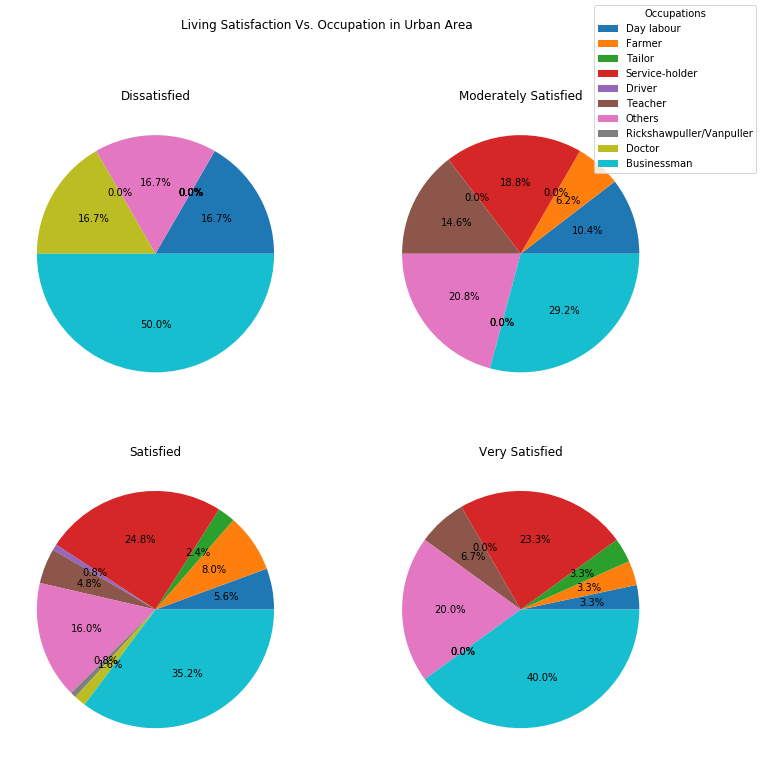

In [14]:
statisfaction_vs_occupation=urban_df.groupby('isStaisfied')['occupation'].apply(list).reset_index(name='new')
labels=urban_occupations

dissatisfied,moderately_satisfied,satisfied,very_satisfied=[0.]*len(labels),[0.]*len(labels),[0.]*len(labels),[0.]*len(labels)


for index, row in statisfaction_vs_occupation.iterrows():
    occupation=row['new']

    for e in occupation:
#         if e=='Post-graduate' or e=="Others":
#             continue 
        if row['isStaisfied']=="Not applicable":
            dissatisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Moderately satisfied":
            moderately_satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Satisfied":
            satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Very satisfied":
            very_satisfied[labels.index(e)]+=1
            
            
fig, axs = plt.subplots(2, 2,figsize=(12, 12))

axs[0, 0].pie(dissatisfied/np.sum(dissatisfied), autopct='%1.1f%%')
axs[0, 0].title.set_text('Dissatisfied')
axs[0, 1].pie(moderately_satisfied/np.sum(moderately_satisfied), autopct='%1.1f%%')
axs[0, 1].title.set_text('Moderately Satisfied')
axs[1, 0].pie(satisfied/np.sum(satisfied), autopct='%1.1f%%')
axs[1, 0].title.set_text('Satisfied')
axs[1, 1].pie(very_satisfied/np.sum(very_satisfied), autopct='%1.1f%%')
axs[1,1].title.set_text('Very Satisfied')
fig.legend( labels,title="Occupations")

fig.suptitle("Living Satisfaction Vs. Occupation in Urban Area")

plt.show()

## Living Satisfaction Vs. Occupation in Urban Area
But in urban area there are very few famres and they are not satisfied with the lives because of the highs cost living condition

In [15]:
print(sorted(list(set(rural_df['savings'].tolist()))))
saving_labels=[
 'Less than 10000',
 '10001 to 20000',
 '20001 to 50000',
 '50001 to 100000',
 '100001 to 200000',     
 '200001 to 500000',
 '500001 to 1000000',
    'More than 1000000'
 ]

['100001 to 200000', '10001 to 20000', '200001 to 500000', '20001 to 50000', '500001 to 1000000', '50001 to 100000', 'Less than 10000']


[2.0, 2.0, 7.0, 5.0, 5.0, 3.0, 0.0, 0.0]
[11.0, 10.0, 20.0, 12.0, 9.0, 3.0, 3.0, 0.0]


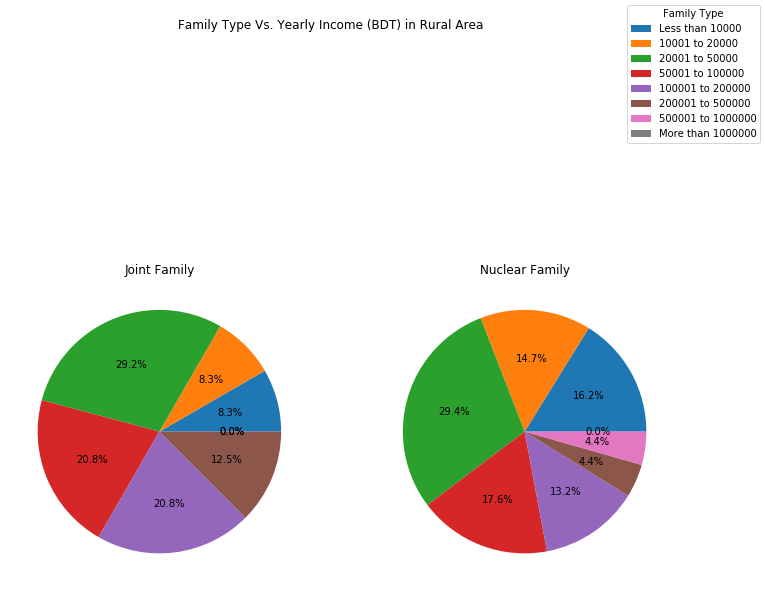

In [16]:
savings_vs_familyType=rural_df.groupby('family_type')['savings'].apply(list).reset_index(name='new')
labels=saving_labels

joint_family,neuclear_family=[0.]*len(labels),[0.]*len(labels)

for index, row in savings_vs_familyType.iterrows():
    savings=row['new']

    for e in savings:
        
        if row['family_type']=='Joint family':
            joint_family[labels.index(e)]+=1
        elif row['family_type']=='Nuclear family':
            neuclear_family[labels.index(e)]+=1


print(joint_family)
print(neuclear_family)

fig, axs = plt.subplots(1, 2,figsize=(12, 12))

axs[0].pie(joint_family/np.sum(joint_family), autopct='%1.1f%%')
axs[0].title.set_text('Joint Family')
axs[1].pie(neuclear_family/np.sum(neuclear_family), autopct='%1.1f%%')
axs[1].title.set_text('Nuclear Family')

fig.legend( labels,title="Family Type")
fig.suptitle("Family Type Vs. Yearly Income (BDT) in Rural Area")
plt.show()

## Family Type Vs. Yearly Income (BDT) in Rural Area
In the figure above, we show the result how income varies between neuclear and joint family in rural are. It is expected that neuclear family will have more income due to having more income source.

In [17]:
saving_labels=[
 'Less than 10000',
 '10001 to 20000',
 '20001 to 50000',
 '50001 to 100000',
 '100001 to 200000',     
 '200001 to 500000',
 '500001 to 1000000',
 'More than 1000000'
 ]

[5.0, 4.0, 10.0, 17.0, 11.0, 11.0, 0.0, 0.0]
[5.0, 17.0, 46.0, 40.0, 32.0, 14.0, 4.0, 1.0]


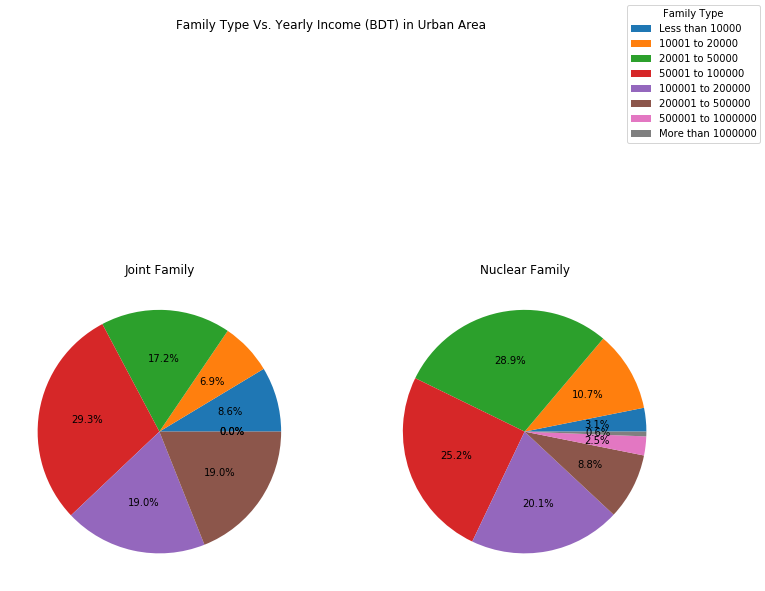

In [18]:
savings_vs_familyType=urban_df.groupby('family_type')['savings'].apply(list).reset_index(name='new')
labels=saving_labels

joint_family,neuclear_family=[0.]*len(labels),[0.]*len(labels)

for index, row in savings_vs_familyType.iterrows():
    savings=row['new']

    for e in savings:
        
        if row['family_type']=='Joint family':
            joint_family[labels.index(e)]+=1
        elif row['family_type']=='Nuclear family':
            neuclear_family[labels.index(e)]+=1


print(joint_family)
print(neuclear_family)

fig, axs = plt.subplots(1, 2,figsize=(12, 12))

axs[0].pie(joint_family/np.sum(joint_family), autopct='%1.1f%%')
axs[0].title.set_text('Joint Family')
axs[1].pie(neuclear_family/np.sum(neuclear_family), autopct='%1.1f%%')
axs[1].title.set_text('Nuclear Family')

fig.legend( labels,title="Family Type")

fig.suptitle("Family Type Vs. Yearly Income (BDT) in Urban Area")

plt.show()

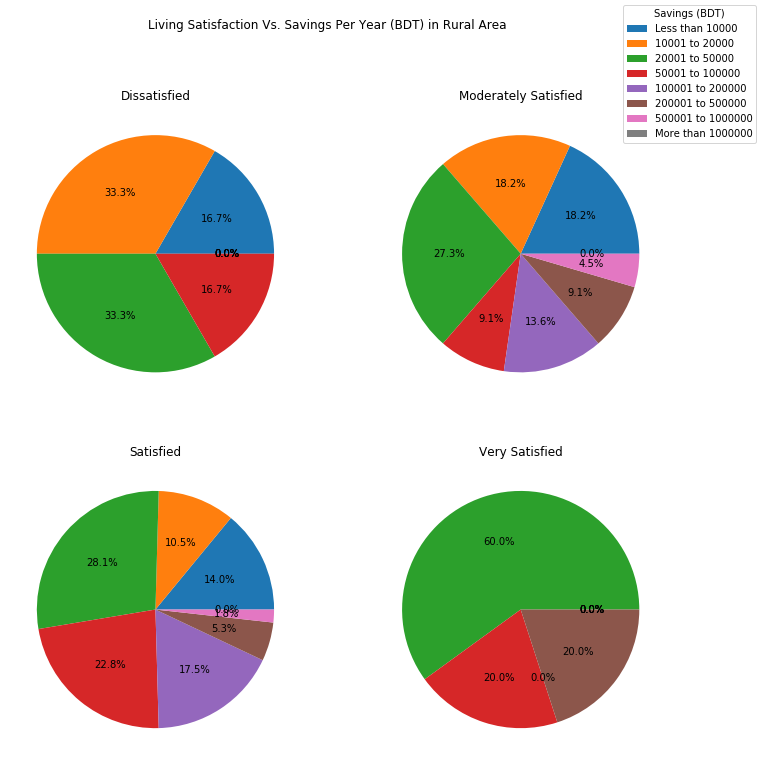

In [19]:
statisfaction_vs_savings=rural_df.groupby('isStaisfied')['savings'].apply(list).reset_index(name='new')
labels=saving_labels

dissatisfied,moderately_satisfied,satisfied,very_satisfied=[0.]*len(labels),[0.]*len(labels),[0.]*len(labels),[0.]*len(labels)


for index, row in statisfaction_vs_savings.iterrows():
    occupation=row['new']

    for e in occupation:
#         if e=='Post-graduate' or e=="Others":
#             continue 
        if row['isStaisfied']=="Not applicable":
            dissatisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Moderately satisfied":
            moderately_satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Satisfied":
            satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Very satisfied":
            very_satisfied[labels.index(e)]+=1
            
            
fig, axs = plt.subplots(2, 2,figsize=(12, 12))

axs[0, 0].pie(dissatisfied/np.sum(dissatisfied), autopct='%1.1f%%')
axs[0, 0].title.set_text('Dissatisfied')
axs[0, 1].pie(moderately_satisfied/np.sum(moderately_satisfied), autopct='%1.1f%%')
axs[0, 1].title.set_text('Moderately Satisfied')
axs[1, 0].pie(satisfied/np.sum(satisfied), autopct='%1.1f%%')
axs[1, 0].title.set_text('Satisfied')
axs[1, 1].pie(very_satisfied/np.sum(very_satisfied), autopct='%1.1f%%')
axs[1,1].title.set_text('Very Satisfied')

fig.legend( labels,title="Savings (BDT)")
fig.suptitle("Living Satisfaction Vs. Savings Per Year (BDT) in Rural Area")
plt.show()

## Living Satisfaction Vs. Savings Per Year (BDT) in Rural Area
In the figure above, I showed how living satisfaction varies with savings in rural are per year in BDT. The interesting observation over here is that people with less savings are the happiest. This is consistent with the results above.

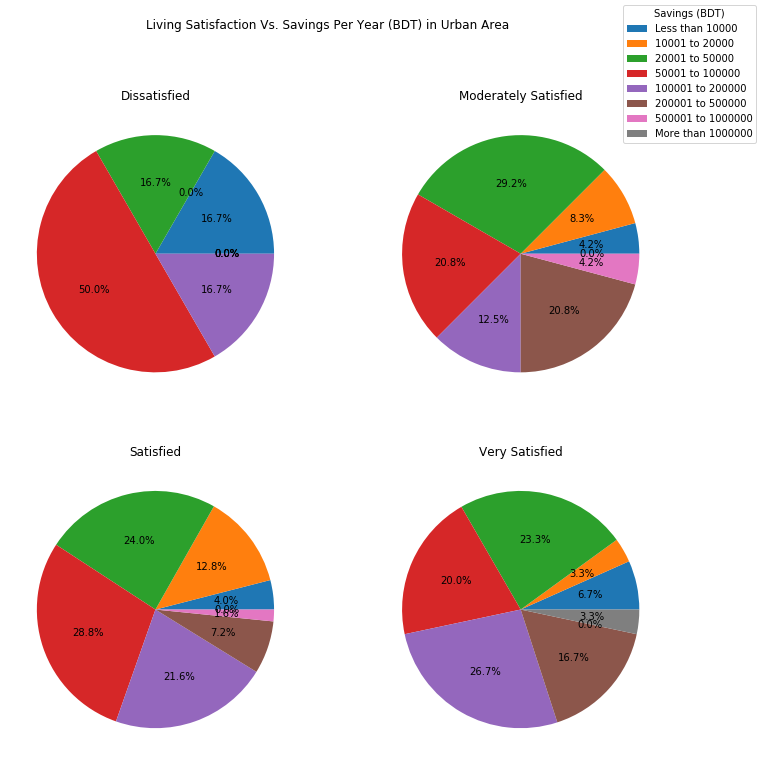

In [20]:
statisfaction_vs_savings=urban_df.groupby('isStaisfied')['savings'].apply(list).reset_index(name='new')
labels=saving_labels

dissatisfied,moderately_satisfied,satisfied,very_satisfied=[0.]*len(labels),[0.]*len(labels),[0.]*len(labels),[0.]*len(labels)


for index, row in statisfaction_vs_savings.iterrows():
    occupation=row['new']

    for e in occupation:
#         if e=='Post-graduate' or e=="Others":
#             continue 
        if row['isStaisfied']=="Not applicable":
            dissatisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Moderately satisfied":
            moderately_satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Satisfied":
            satisfied[labels.index(e)]+=1
        elif row['isStaisfied']=="Very satisfied":
            very_satisfied[labels.index(e)]+=1
            
            
fig, axs = plt.subplots(2, 2,figsize=(12, 12))

axs[0, 0].pie(dissatisfied/np.sum(dissatisfied), autopct='%1.1f%%')
axs[0, 0].title.set_text('Dissatisfied')
axs[0, 1].pie(moderately_satisfied/np.sum(moderately_satisfied), autopct='%1.1f%%')
axs[0, 1].title.set_text('Moderately Satisfied')
axs[1, 0].pie(satisfied/np.sum(satisfied), autopct='%1.1f%%')
axs[1, 0].title.set_text('Satisfied')
axs[1, 1].pie(very_satisfied/np.sum(very_satisfied), autopct='%1.1f%%')
axs[1,1].title.set_text('Very Satisfied')

fig.legend( labels,title="Savings (BDT)")
fig.suptitle("Living Satisfaction Vs. Savings Per Year (BDT) in Urban Area")
plt.show()

## Living Satisfaction Vs. Savings Per Year (BDT) in Urban Area
In the urban area we also observe the simialr results. But one exception is there are some very reach people in urban are who are also very satisfied due to their excessive wealth.